In [2]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [1]:
tmin = 0.0
tmax = 60.0
xmin = -15.0
xmax = 15.0
ymin = -15.0
ymax = 15.0
NPoints = 300
dx = (xmax - xmin)/NPoints
dy = (ymax - ymin)/NPoints
dRejilla = 10.0
c = 1.0
r = 0.7
dt = (r*dx)/c
NTime = int((tmax - tmin)/dt)+1

In [3]:
xPoints=np.linspace(xmin,xmax,NPoints)
yPoints=np.linspace(ymin,ymax,NPoints)
xmesh,ymesh=np.meshgrid(xPoints,yPoints)
tPoints=np.linspace(tmin,tmax,NTime)
E_T=np.zeros((NTime,NPoints,NPoints))


stdev=0.2
E_T[0]=-0.5*np.exp(-xmesh**2/(2*stdev**2))*np.exp(-(ymesh-5)**2/(2*stdev**2))
E_T[1]=E_T[0]+r**2/2.*(np.roll(E_T[0],1,axis=0)+np.roll(E_T[0],-1,axis=0)+np.roll(E_T[0],1,axis=1)+np.roll(E_T[0],-1,axis=1)-4*E_T[0])
E_T[0,0]=0
E_T[0,-1]=0
E_T[0,99,:(NPoints/2-int(dRejilla/dx)/2)]=0
E_T[0,99,(NPoints/2+int(dRejilla/dx)/2):]=0
E_T[1,:,0]=0
E_T[1,:,-1]=0
E_T[1,99,:(NPoints/2-int(dRejilla/dx)/2)]=0
E_T[1,99,(NPoints/2+int(dRejilla/dx)/2):]=0

print (np.shape(E_T))

(858, 300, 300)


In [4]:
for i in range(2,NTime):
    pE_T=E_T[i-1]
    ppE_T=E_T[i-2]
    E_T[i]=2*(1.-2.*r**2)*pE_T-ppE_T+r**2*(np.roll(pE_T,1,axis=1)+np.roll(pE_T,-1,axis=1)+np.roll(pE_T,1,axis=0)+np.roll(pE_T,-1,axis=0))
    E_T[i,0]=0
    E_T[i,-1]=0
    E_T[i,:,0]=0
    E_T[i,:,-1]=0
    E_T[i,99,:(NPoints/2-int(dRejilla/dx)/2)]=0
    E_T[i,99,(NPoints/2+int(dRejilla/dx)/2):]=0

In [6]:
with PdfPages ('loquesea.pdf') as pdf:
    
    tiempos = [428, 857]
    for tiempo in tiempos:
        
        fig=plt.figure(figsize=(10,10))
        plt.pcolor(xPoints,yPoints,E_T[tiempo],cmap='gist_heat')
        plt.hlines(y=-5.0, xmin = -15.0, xmax= 0.0-dRejilla/2.0,  color='b', linewidth=5)
        plt.hlines(y=-5.0, xmin = 0.0+dRejilla/2.0, xmax= 15.0,  color='b', linewidth=5)
        plt.hlines([-14.85, 14.82], xmin = -15.0, xmax= 15.0,  color='b', linewidth=5)
        plt.vlines([-14.8, 14.82], ymin=-15.0, ymax=15.0, color='b', linewidth=5)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$Profundidad$',rotation=0)
        plt.xlim(xmin+dx,xmax-dx)
        plt.ylim(ymin+dy,ymax-dy)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title('$Onda\ t\ =\ {}$'.format(int(tiempo*dt)+1))
        pdf.savefig()
        plt.close()
    

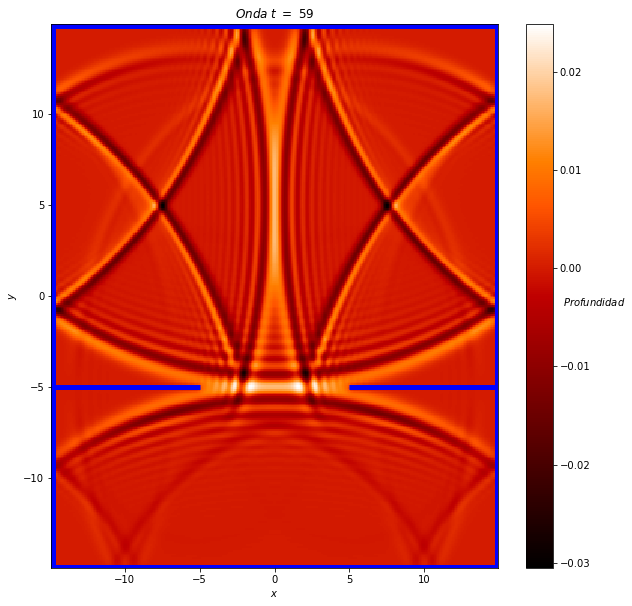

In [13]:
fig=plt.figure(figsize=(10,10))
plt.pcolor(xPoints,yPoints,E_T[428],cmap='gist_heat')
plt.hlines(y=-5.0, xmin = -15.0, xmax= 0.0-dRejilla/2.0,  color='b', linewidth=5)
plt.hlines(y=-5.0, xmin = 0.0+dRejilla/2.0, xmax= 15.0,  color='b', linewidth=5)
plt.hlines([-14.85, 14.82], xmin = -15.0, xmax= 15.0,  color='b', linewidth=5)
plt.vlines([-14.8, 14.82], ymin=-15.0, ymax=15.0, color='b', linewidth=5)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$Profundidad$',rotation=0)
plt.xlim(xmin+dx,xmax-dx)
plt.ylim(ymin+dy,ymax-dy)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$Onda\ t\ =\ {}$'.format(int(857*dt)))
plt.show()

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
fig2 = plt.figure()

ims = []
for add in np.arange(50):
    ims.append((plt.pcolor(xPoints, yPoints, E_T[add]),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
im_ani.save('onda.mp4', writer=writer)

In [5]:
1.-2.*1

-1.0